<a href="https://colab.research.google.com/github/quarcs-lab/pysal-datasets/blob/master/130_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualisation

In [2]:
! pip install -q geopandas

In [4]:
! pip install -q contextily

In [5]:
%matplotlib inline

import geopandas
import seaborn
import contextily
import matplotlib.pyplot as plt
import pandas



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
# From: https://github.com/sjsrey/pysalnarsc19/tree/master/content/data
# db = geopandas.read_file('data/texas.shp')

In [10]:
# Clone entire Github repository
!git clone -l -s git://github.com/quarcs-lab/pysal-datasets.git cloned-repo
# Change working directory to cloned-repo
%cd cloned-repo
# Show contents of repo
#!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 1710 (delta 8), reused 21 (delta 4), pack-reused 1674
Receiving objects: 100% (1710/1710), 187.91 MiB | 23.22 MiB/s, done.
Resolving deltas: 100% (639/639), done.
Checking out files: 100% (2806/2806), done.
/content/cloned-repo/cloned-repo


In [11]:
db = geopandas.read_file('texas/texas.shp')

In [12]:
db.head()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,HR70,HR80,HR90,HC60,HC70,HC80,HC90,PO60,PO70,PO80,PO90,RD60,RD70,RD80,RD90,PS60,PS70,PS80,PS90,UE60,UE70,UE80,UE90,DV60,DV70,DV80,DV90,MA60,MA70,MA80,MA90,POL60,POL70,POL80,POL90,DNL60,DNL70,DNL80,DNL90,MFIL59,MFIL69,MFIL79,MFIL89,FP59,FP69,FP79,FP89,BLK60,BLK70,BLK80,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
0,Lipscomb,Texas,48,295,48295,48,295,48295,1,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3406,3486,3766,3143,-0.917852,-0.602338,-0.355503,-0.605607,-1.514026,-1.449058,-1.476411,-1.571799,2.0,1.7,1.941176,1.732852,1.494886,2.270948,3.516484,6.101695,32.4,34.3,31.0,35.8,8.133294,8.156510,8.233769,8.052933,1.293817,1.317034,1.395364,1.215386,8.531885,8.970432,9.802064,10.252241,22.4,12.1,10.851263,9.140370,0.029360,0.028686,0.026553,0.031817,0.286929,0.378219,0.407005,0.373005,6.724512,4.5,3.835360,6.093580,"POLYGON ((-100.00687 36.49388, -100.00114 36.4..."
1,Sherman,Texas,48,421,48421,48,421,48421,1,0.0,18.229879,10.501995,0.000000,0.0,0.666667,0.333333,0.000000,2605,3657,3174,2858,-1.113594,-1.081211,-0.492131,-0.519201,-1.714700,-1.407486,-1.597010,-1.635240,3.6,3.6,1.230349,3.343239,2.297593,2.511774,3.807947,5.968779,29.6,26.3,31.7,34.4,7.865188,8.204398,8.062748,7.957877,1.045172,1.384382,1.235227,1.130140,8.666130,9.038840,9.854087,10.178274,20.1,7.7,8.459870,10.761790,0.000000,0.464862,0.126024,0.139958,0.288976,0.359377,0.415453,0.378041,5.665722,1.7,3.253796,3.869407,"POLYGON ((-102.16757 36.05463, -102.16522 36.4..."
2,Dallam,Texas,48,111,48111,48,111,48111,1,0.0,11.088933,5.103864,18.311665,0.0,0.666667,0.333333,1.000000,6302,6012,6531,5461,-0.470982,-0.175927,0.139469,0.258405,-1.200047,-1.204341,-1.234283,-1.338314,2.4,4.5,2.239602,2.276423,3.446752,3.973820,4.849785,8.396560,31.3,30.2,29.0,32.6,8.748622,8.701513,8.784315,8.605387,1.439410,1.392300,1.467435,1.288972,8.454466,8.861208,9.571784,10.062285,29.9,14.7,14.922907,15.994962,0.920343,1.829674,2.526412,2.050906,0.331667,0.385996,0.370037,0.376015,7.546049,7.2,9.471366,14.231738,"POLYGON ((-102.16757 36.05463, -103.02356 36.0..."
3,Hansford,Texas,48,195,48195,48,195,48195,1,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,6208,6351,6209,5848,-1.248299,-0.896143,-0.684286,-0.521268,-1.039568,-0.999173,-1.109016,-1.132594,1.0,3.8,1.818806,4.007634,2.479733,3.466907,4.626027,6.238185,25.6,27.5,29.9,32.9,8.733594,8.756368,8.733755,8.673855,1.923452,1.946225,1.908512,1.849590,8.686261,9.041093,9.958165,10.320585,15.1,8.2,8.371041,9.683313,0.112758,0.000000,0.032211,0.000000,0.253527,0.357813,0.393938,0.383924,7.591786,4.7,5.542986,7.125457,"POLYGON ((-101.61950 36.05471, -101.62032 36.4..."
4,Ochiltree,Texas,48,357,48357,48,357,48357,1,0.0,6.870019,10.429704,3.651767,0.0,0.666667,1.000000,0.333333,9380,9704,9588,9128,-1.565398,-1.125893,-1.330064,-0.463557,-0.720305,-0.688084,-0.792819,-0.819903,2.4,4.1,2.162044,4.874067,2.364439,3.163235,5.366528,7.104154,25.1,27.0,28.2,31.5,9.146335,9.180293,9.168268,9.119102,2.336193,2.370151,2.345090,2.297340,8.715388,9.153453,10.011490,10.317086,11.1,6.7,5.459240,10.735736,0.000000,0.000000,0.020859,0.021911,0.236998,0.352940,0.343949,0.374461,5.172414,4.0,4.758392,9.159159,"POLYGON ((-101.08231 36.05626, -101.08967 36.4..."


## Non-spatial visualisation

### Univariate continuous

* Histograms

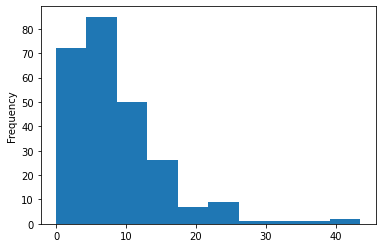

In [13]:
db['HR90'].plot.hist()

* KDEs

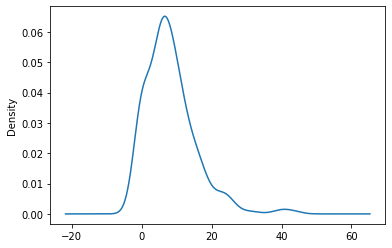

In [14]:
db['HR90'].plot.kde()

### Bivariate continuous

* Scatter plots

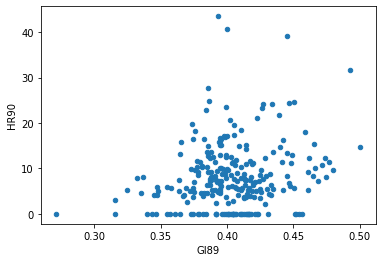

In [15]:
db[['GI89', 'HR90']].plot.scatter('GI89', 'HR90')

* Hexbin plots

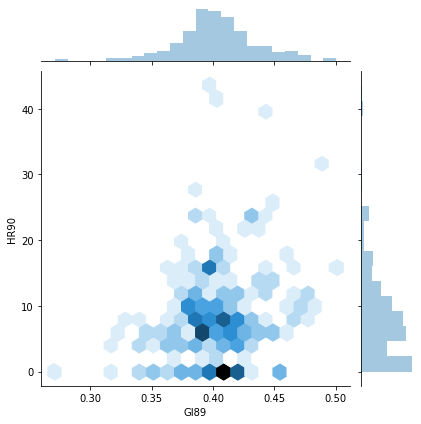

In [17]:
seaborn.jointplot('GI89', 
                  'HR90', 
                  db, 
                  kind='hex')

* 2D KDEs

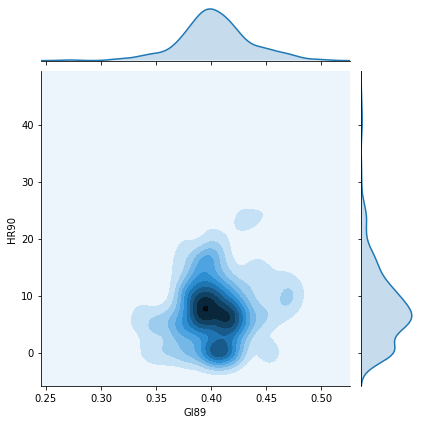

In [18]:
seaborn.jointplot('GI89', 
                  'HR90', 
                  db, 
                  kind='kde')

### Categorical plots

* Categorical scatter plots

In [19]:
db.PO90

0        3143
1        2858
2        5461
3        5848
4        9128
        ...  
249       460
250     40518
251    383545
252     17705
253    260120
Name: PO90, Length: 254, dtype: int64

In [20]:
p90max = db.PO90.max()

In [21]:
width = int(p90max/3)+2
db['pop_cats'] = pandas.cut(db.PO90, [0, 5000, 100000, p90max])

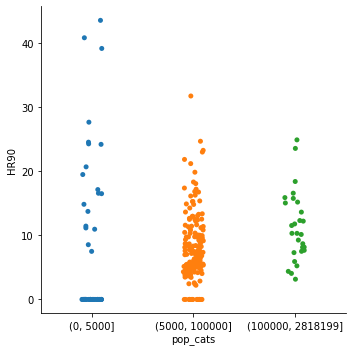

In [22]:
seaborn.catplot(x="pop_cats",
                y="HR90",
                data=db)

* Box plots

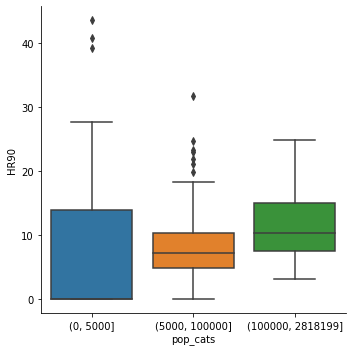

In [23]:
seaborn.catplot(x="pop_cats",
                y="HR90",
                data=db,
                kind='box')

* Violin plots

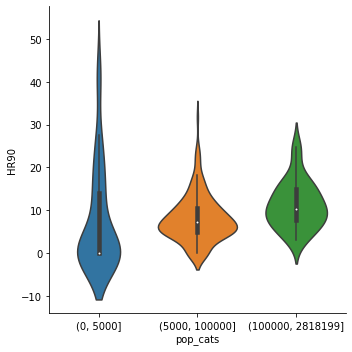

In [24]:
seaborn.catplot(x="pop_cats",
                y="HR90",
                data=db,
                kind='violin')

## Anatomy of a graphic

### Figures

In [25]:
f = plt.figure()

<Figure size 432x288 with 0 Axes>

* Change size

In [26]:
# Size
f = plt.figure(figsize=(12, 12))

<Figure size 864x864 with 0 Axes>

### Axes

* One axis (`ax`) inside a figure (`f`)

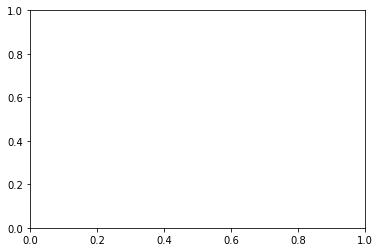

In [27]:
f, ax = plt.subplots(1)

* Two rows, one column of axes (`axs`) inside a figure (`f`)

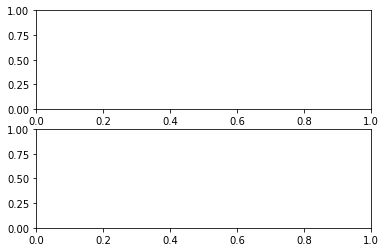

In [28]:
f, axs = plt.subplots(2)

* One row, two columns of axes (`axs`) inside a figure (`f`)

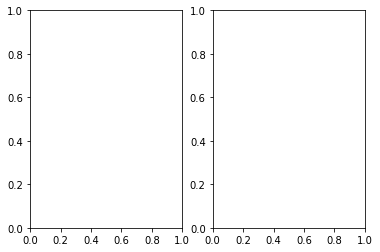

In [29]:
f, axs = plt.subplots(1, 2)

* Embed data on an axis

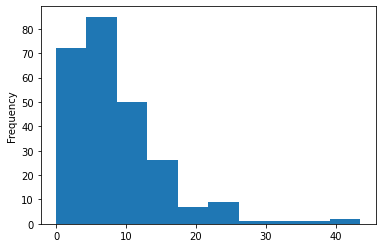

In [30]:
f, ax = plt.subplots(1)
db['HR90'].plot.hist()
#db.plot(ax=ax)

* Embed data on two axes

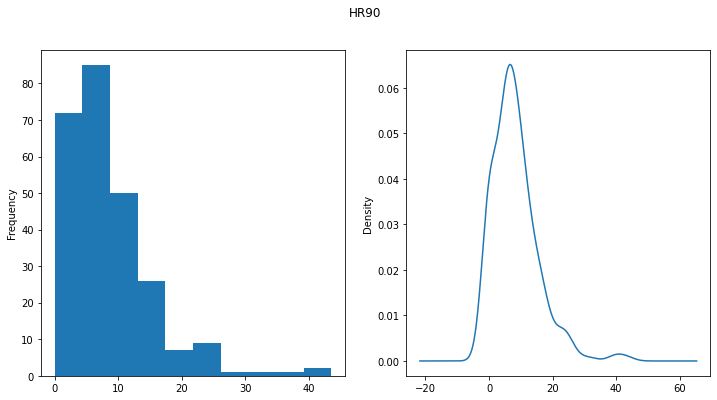

In [31]:
f, axs = plt.subplots(1, 2, figsize=(12, 6))
# First axis

db['HR90'].plot.hist(ax=axs[0])
# Second axis
db['HR90'].plot.kde(ax=axs[1])
# Title
f.suptitle("HR90")
# Display
plt.show()

### Layers

* Tweak a layer

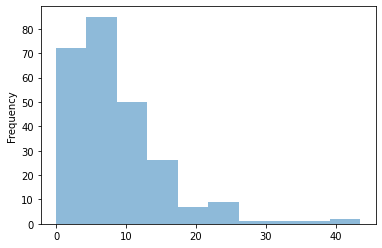

In [32]:
# Transparency
db.HR90.plot.hist(alpha=0.5)

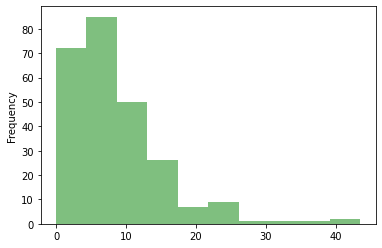

In [33]:
# color and transparency
db.HR90.plot.hist(alpha=0.5, color='green')

---

<a rel="license" href="http://creativecommons.org/licenses/by-nc-
sa/4.0/"><img alt="Creative Commons License" style="border-width:0"
src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span
xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Visualization</span> by <a xmlns:cc="http://creativecommons.org/ns#"
href="http://sergerey.org" property="cc:attributionName"
rel="cc:attributionURL">Serge Rey</a> is licensed under a <a
rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative
Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.